In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 5s 0us/step


In [4]:
def prepare_image(file):
    img_path = '/Database/jpg/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [5]:
train_path = '/Users/luoluo/BLS/DataBase/jpg/train_set'
# valid_path = 'valid'
test_path = '/Users/luoluo/BLS/DataBase/jpg/test_set'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['non', 'real'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['non', 'real'], batch_size=10, shuffle=False)

Found 7828 images belonging to 2 classes.
Found 2276 images belonging to 2 classes.


In [7]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [8]:
x = mobile.layers[-6].output

In [9]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [10]:
output = Dense(units=2, activation='softmax')(x)

In [11]:
model = Model(inputs=mobile.input, outputs=output)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [13]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
783/783 - 600s - loss: 0.2773 - accuracy: 0.8817
Epoch 2/10
783/783 - 578s - loss: 0.1816 - accuracy: 0.9295
Epoch 3/10
783/783 - 587s - loss: 0.1572 - accuracy: 0.9396
Epoch 4/10
783/783 - 620s - loss: 0.1290 - accuracy: 0.9516
Epoch 5/10
783/783 - 617s - loss: 0.1117 - accuracy: 0.9610
Epoch 6/10
783/783 - 682s - loss: 0.0932 - accuracy: 0.9687
Epoch 7/10
783/783 - 777s - loss: 0.0787 - accuracy: 0.9734
Epoch 8/10
783/783 - 739s - loss: 0.0644 - accuracy: 0.9796
Epoch 9/10
783/783 - 770s - loss: 0.0558 - accuracy: 0.9845
Epoch 10/10
783/783 - 634s - loss: 0.0430 - accuracy: 0.9894


In [16]:
 test_labels = test_batches.classes

In [18]:
predictions = model.predict(x=test_batches, verbose=0)

In [19]:
def plot_confusion_matrix(cm, classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [21]:
cm_plot_labels = ['non','real']

Confusion matrix, without normalization
[[ 784  216]
 [  31 1245]]


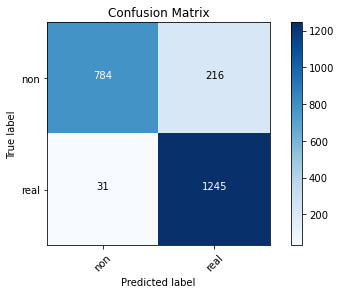

In [22]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')